## Assignment 3

This assignmemt is based on content discussed in modules 3 - 5 and test basic concepts of statistical inference theory and probability distributions.

## Learning outcomes

-   Work on problems of different distributions eg., gaussian 
-   Calculate z score 
-	Make statistical inferences on given data
-	Construct a null and an alternate hypothesis
-	Find the p-value for a given hypothesis and T test statistic.

**Question 1**

The Capital Asset Pricing Model (CAPM) is a financial model that assumes returns on a portfolio are normally distributed.  Suppose a portfolio has an average annual return of 14.7% (i.e., an average gain on 14.7%) with a standard deviation of 33%.  A return of 0% means the value of the portfolio doesn't change, a negative return means that the portfolio loses money, and a positive return means that the portfolio gains money. Determine the following:

1. What percentage of years does this portfolio lose money, (i.e. have a return less than 0%)?
2. What is the cutoff for the highest 15% of annual returns with this portfolio?

See CAPM here https://en.wikipedia.org/wiki/Capital_asset_pricing_model 

In [3]:
import numpy as np
import scipy.stats as stats

import matplotlib.pyplot as plt

In [ ]:
## 1. What percentage of years does this portfolio lose money, (i.e. have a return less than 0%)?

In [7]:
# First we define the parameters and possible values
m = 14.7
sd = 33
x = np.linspace(m - 3*sd, m + 3*sd,100)

C:\Users\BRUNO~1.GON\AppData\Local\Temp/ipykernel_17856/1150852012.py:10: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


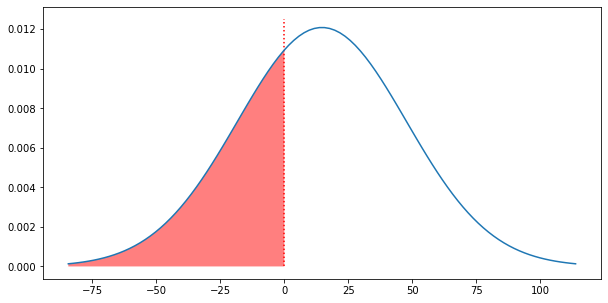

In [27]:
# The return distribution follows the curve below
# The filled are is the percentage of years where the portfolio loss money
fig, ax = plt.subplots(figsize=(10,5))

ax.plot(x, stats.norm.pdf(x, m, sd))
ax.vlines(x=0, ymin=0, ymax=0.0125, colors='red', ls=":")
ax.fill_between(x=np.linspace(m - 3*sd, 0, 50),
                y1=stats.norm.pdf(np.linspace(m - 3*sd, 0, 50), m, sd),
                alpha=0.5,
                facecolor='red')

fig.show()

In [32]:
print("The percentage of years where the portafolio loss money is {}%".format(round(100*stats.norm.cdf(0, m, sd),1)))

The percentage of years where the portafolio loss money is 32.8%


In [33]:
## 2. What is the cutoff for the highest 15% of annual returns with this portfolio?

In [37]:
r = stats.norm.ppf(0.85, m, sd)

C:\Users\BRUNO~1.GON\AppData\Local\Temp/ipykernel_17856/99398921.py:13: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


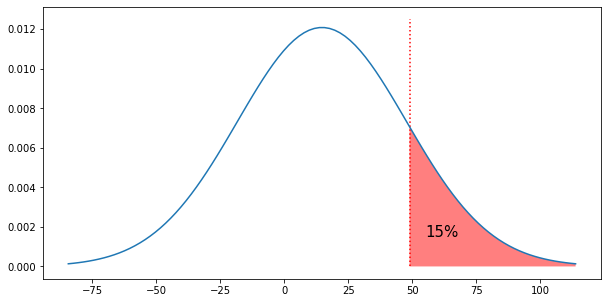

In [44]:
# The return distribution follows the curve below
# The filled are is the percentage of years where the highest 15% of annual returns.
fig, ax = plt.subplots(figsize=(10,5))

ax.plot(x, stats.norm.pdf(x, m, sd))
ax.vlines(x=r, ymin=0, ymax=0.0125, colors='red', ls=":")
ax.fill_between(x=np.linspace(r, m + 3*sd, 50),
                y1=stats.norm.pdf(np.linspace(r, m + 3*sd, 50), m, sd),
                alpha=0.5,
                facecolor='red')
plt.text(x=55, y=0.0015, s= '15%',fontsize=15)

fig.show()

In [47]:
print("The cutoff for highest 15% off annual return is {}%".format(round(r,1)))

The cutoff for highest 15% off annual return is 48.9%


**Question 2**

Past experience indicates that because of low morale, a company loses 20 hours a year per employee due to lateness and abstenteeism.  Assume that the standard deviation of the population is 6 and normally distributed.

The HR department implemented a new rewards system to increase employee morale, and after a few months it collected a random sample of 20 employees and the annualized absenteeism was 14.

1. Could you confirm that the new rewards system was effective with a 90% confidence?
2. An HR subject matter expert would be very happy if the program could reduce absenteeism by 20% (i.e. to 16 hours).  Given the current sampling parameters (sample size of 20 and std. dev. of population. 6), what is the probability that the new rewards system reduced absenteeism to 16 hours and you miss it?
3. What should the sample size be if you want β to be 5%

In [148]:
# 1. Could you confirm that the new rewards system was effective with a 90% confidence?
from math import sqrt

Our hypothesis are:

$H_0$: $\mu \geq 20$

$H_a$: $\mu < 20$

In [149]:
n_samples = 20
sigma = 6

se = sigma/sqrt(n_samples)

In [150]:
p_value= stats.norm.cdf(14, loc=20, scale=se)
print('P-value for given sample is ', p_value)

P-value for given sample is  3.872108215522035e-06


Text(0.5, 1.0, 'Test')

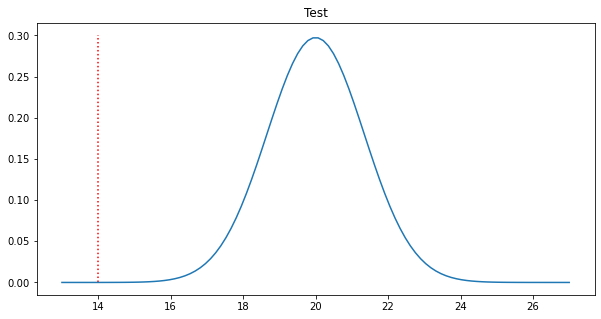

In [151]:
fig, ax = plt.subplots(figsize=(10,5))

x = np.linspace(13, 27, 100)
plt.plot(x, stats.norm.pdf(x, loc=20, scale=se))
# P-value
ax.vlines(x=14, ymin=0, ymax=0.3, colors='red', ls=":")
ax.fill_between(x=np.linspace(13, 14, 50),
                y1=stats.norm.pdf(np.linspace(13, 14, 50), 20, se),
                alpha=0.5,
                facecolor='red')
plt.title("Test")

For this sample, we find a $p-value = 4\times10^{-6}$ much smaller than the significance level $\alpha=0.1$. We may reject the null hypothesis and our conclusion is that the collected sample confirms the reduction of loosed hours.

In [152]:
# 2. An HR subject matter expert would be very happy if the program could reduce absenteeism by 20% (i.e. to 16 hours).
# Given the current sampling parameters (sample size of 20 and std. dev. of population. 6),
# what is the probability that the new rewards system reduced absenteeism to 16 hours and you miss it?

In [153]:
x_crit = stats.norm.ppf(0.1, loc=20, scale=se)

print("The value that starts accepting Ho is {}, with a 90% of confidence".format(round(x_crit,2)))

The value that starts accepting Ho is 18.28, with a 90% of confidence


Text(0.5, 1.0, 'Test')

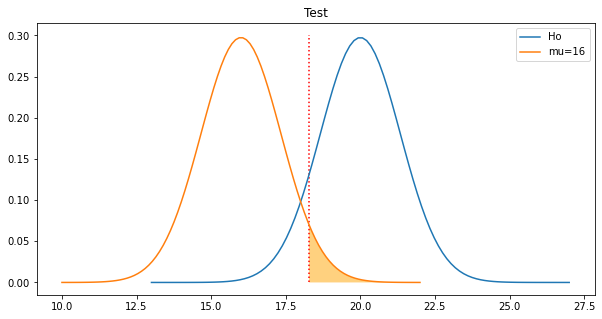

In [154]:
fig, ax = plt.subplots(figsize=(10,5))

x = np.linspace(13, 27, 100)

plt.plot(x, stats.norm.pdf(x, loc=20, scale=se), label="Ho")
ax.vlines(x=x_crit, ymin=0, ymax=0.3, colors='red', ls=":")


y = np.linspace(10, 22, 100)

plt.plot(y, stats.norm.pdf(y, loc=16, scale=se), label="mu=16")
ax.fill_between(x=np.linspace(x_crit, 22, 50),
                y1=stats.norm.pdf(np.linspace(x_crit, 22, 50), 16, se),
                alpha=0.5,
                facecolor='orange')
plt.legend()
plt.title("Test")

In [155]:
print("The probability that the new rewards system reduced absenteeism to 16 hours and I miss it is: {}"
      .format(round(1-stats.norm.cdf(x_crit, loc=16, scale=se),2)))

The probability that the new rewards system reduced absenteeism to 16 hours and I miss it is: 0.04


In [156]:
# 3. What should the sample size be if you want β to be 5%

In [165]:
# Find Z-score for 1% significance level:
Z_a = stats.norm.ppf(0.1)

# and Z-score for 90% power of test:
Z_b = stats.norm.ppf(0.95)

In [166]:
se = (20-16)/(Z_b-Z_a)

In [167]:
N = (6/se)**2
print("The sample size should be {}.".format(round(N)))

The sample size should be 19.


In [168]:
se_new = sigma/sqrt(N)
#x_crit_new = 20 + stats.norm.ppf(0.01) * se_new
x_crit_new = stats.norm.ppf(0.1, loc=20, scale=se_new)

print('New critical value', x_crit_new)

power_of_test_new = stats.norm.cdf(x_crit_new, loc=16, scale=se_new)

print('The power of test for new sample size and significance level 10% is', power_of_test_new)

New critical value 18.24829238434818
The power of test for new sample size and significance level 10% is 0.95


Text(0.5, 1.0, 'Test')

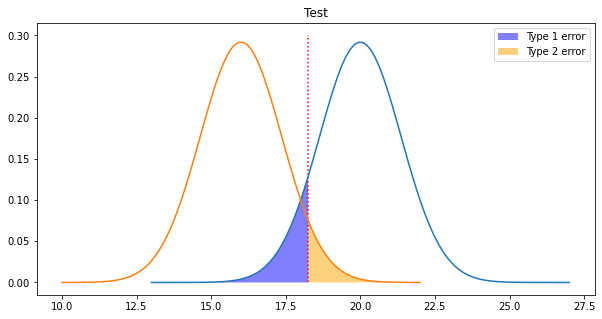

In [170]:
fig, ax = plt.subplots(figsize=(10,5))

x = np.linspace(13, 27, 100)

plt.plot(x, stats.norm.pdf(x, loc=20, scale=se_new))
ax.vlines(x=x_crit_new, ymin=0, ymax=0.3, colors='red', ls=":")
ax.fill_between(x=np.linspace(13,x_crit_new, 50),
                y1=stats.norm.pdf(np.linspace(13,x_crit_new, 50), 20, se_new),
                alpha=0.5,
                facecolor='blue',
                label="Type 1 error")


y = np.linspace(10, 22, 100)

plt.plot(y, stats.norm.pdf(y, loc=16, scale=se_new))
ax.fill_between(x=np.linspace(x_crit_new, 22, 50),
                y1=stats.norm.pdf(np.linspace(x_crit_new, 22, 50), 16, se_new),
                alpha=0.5,
                facecolor='orange',
                label="Type 2 error")
plt.legend()
plt.title("Test")

**Question 3**

Chi-Square Goodness of fit

Please access and review **section 6.3.5** in the OpenIntro Statistics textbook:

Diez, D., Çetinkaya-Rundel, M. & Barr, C (2019). OpenIntro Statistics (4th Ed.). https://leanpub.com/openintro-statistics

Given the information in section 6.3.5, write python code for the following:

 - Calculate the expected values based on the geometric distribution with a probability of 53.2%
 - Compare the expected vs. the observed values from the textbook using the Chi-Square distribution
 - Reach a conclusion
 - Explain what is the business impact of your conclusion

In [2]:
#your work here

In [225]:
from scipy.stats import geom
from scipy.stats import chisquare

In [226]:
x = np.array([1, 2, 3, 4, 5, 6, 7])
obs = np.array([717, 369, 155, 69, 28, 14, 10])

In [227]:
rv = geom(0.532)

In [230]:
a=6 # number to adjust total
exp = (rv.pmf(x)*(obs.sum()+a)).round()

In [231]:
test=chisquare(obs, f_exp=exp)

In [232]:
print('Chi-square Statistic= %.2f' %test.statistic)
print('p-value= %.2f' %test.pvalue)

Chi-square Statistic= 5.20
p-value= 0.52


In [233]:
print('If the null hypothesis is true, the probability of obtaining our sample is',
      np.round(test.pvalue,2)*100,'%',
      'thus we fail to reject the null and state that the observed and expected frequencies are the same.')

If the null hypothesis is true, the probability of obtaining our sample is 52.0 % thus we fail to reject the null and state that the observed and expected frequencies are the same.


This means that the number of days until an up day follows a geometric distributioin. So, the stock market ups and downs are independent from all other days.